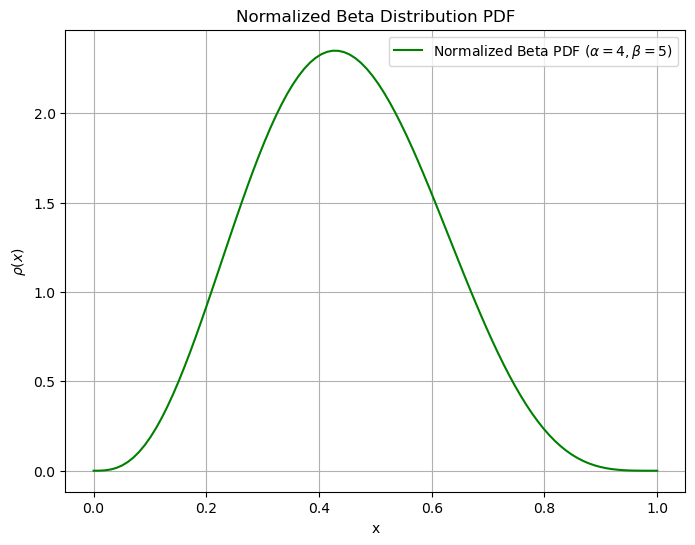

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values and parameters alpha and beta
x_values = np.linspace(0, 1, 100)
alpha = 4
beta = 5

# Define the normalization constant B(alpha, beta)
def beta_normalization(alpha, beta):
    return (gamma(alpha) * gamma(beta)) / gamma(alpha + beta)

# Define the normalized Beta PDF
def beta_pdf_normalized(x, alpha, beta):
    B = beta_normalization(alpha, beta)
    return (x**(alpha - 1) * (1 - x)**(beta - 1)) / B

# Compute the normalized y values for the Beta PDF
y_values_normalized = beta_pdf_normalized(x_values, alpha, beta)

# Plot the normalized Beta distribution
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values_normalized, label=f'Normalized Beta PDF ($\\alpha={alpha}, \\beta={beta}$)', color='green')
plt.xlabel('x')
plt.ylabel('$\\rho(x)$')
plt.grid(True)
plt.legend()
plt.title('Normalized Beta Distribution PDF')
plt.show()


In [30]:
import scipy.optimize as opt

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_35394/3286684736.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Multiplication of $\sigma_x$ and $\sigma_p$ vs n')
/tmp/ipykernel_35394/3286684736.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Scatter plot of $\sigma_x \sigma_p$ vs n')


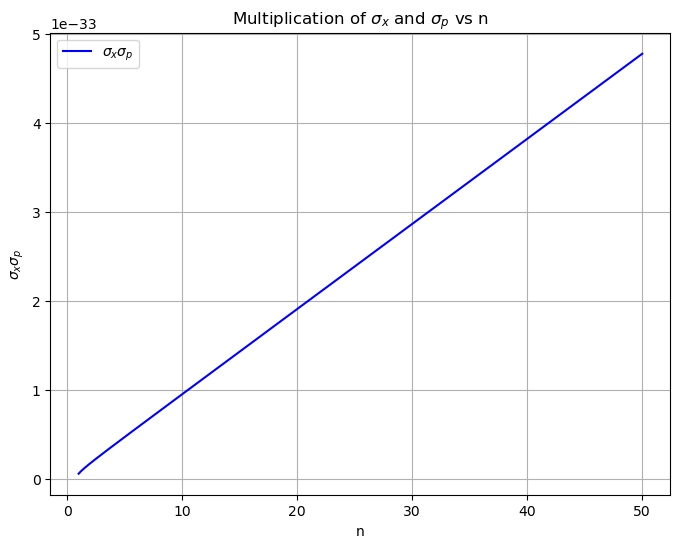

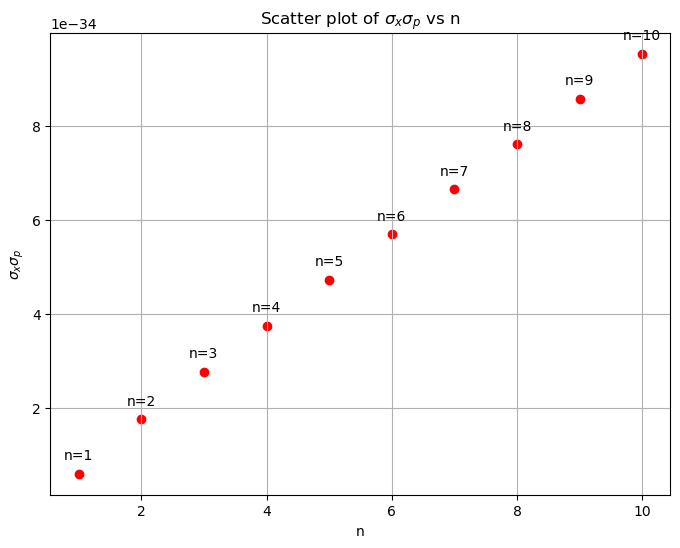

In [14]:
import scipy as sp

# Define constants
hbar = sp.hbar # Reduced Planck's constant in J·s
pi = np.pi

# Function to calculate sigma_x * sigma_p
def sigma_x_sigma_p(n):
    return (hbar * n * pi / np.sqrt(12)) * np.sqrt(1 - 6 / (pi**2 * n**2))

# Range of n values
n_values = np.linspace(1, 50, 500)

# Calculate sigma_x * sigma_p for each n
sigma_values = sigma_x_sigma_p(n_values)

# Scatter plot for each integer n till n = 10
n_values_int_till_10 = n_values_int[:10]
sigma_values_int_till_10 = sigma_values_int[:10]
plt.figure(figsize=(8, 6))
plt.scatter(n_values_int_till_10, sigma_values_int_till_10, color='r', label='Scatter plot for n till 10')
for i, txt in enumerate(n_values_int_till_10):
    plt.annotate(f'n={txt}', (n_values_int_till_10[i], sigma_values_int_till_10[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Scatter plot of $\sigma_x \sigma_p$ vs n')
plt.xlabel('n')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.grid(True)
plt.show()

In [16]:
# Calculate the uncertainty limit
uncertainty_limit = hbar / 2

# Calculate the ratio of sigma_x * sigma_p to the uncertainty limit
ratios = sigma_values / uncertainty_limit

# Find the state that comes closest to the uncertainty limit
closest_state_index = np.argmin(np.abs(ratios - 1))
closest_state_n = n_values_int[closest_state_index]
closest_state_ratio = ratios[closest_state_index]

# Check if the uncertainty principle is satisfied
is_satisfied = np.all(sigma_values >= uncertainty_limit)

print(f"Is the uncertainty principle satisfied? {'Yes' if is_satisfied else 'No'}")
print(f"The state ψ_{closest_state_n}(x) comes closest to the uncertainty limit with a ratio of {closest_state_ratio:.2f}")
print(f"The value of n that gives the closest sigma multiplication to the uncertainty principle is {closest_state_n}")

Is the uncertainty principle satisfied? Yes
The state ψ_1(x) comes closest to the uncertainty limit with a ratio of 1.14
The value of n that gives the closest sigma multiplication to the uncertainty principle is 1


In [17]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [20]:
import sympy as sp

# Declare the symbols
epsilon, gamma, a = sp.symbols('epsilon gamma a')

# Define the system of equations
eq1 = sp.Eq(sp.cos(epsilon) + gamma * sp.sin(epsilon), a)
eq2 = sp.Eq(gamma * sp.cos(epsilon) - sp.sin(epsilon), a * gamma)
display(eq1, eq2)
# Solve the system for gamma and a
solutions = sp.solve([eq1, eq2], (gamma, a))
display(solutions)

Eq(gamma*sin(epsilon) + cos(epsilon), a)

Eq(gamma*cos(epsilon) - sin(epsilon), a*gamma)

[(-I, -I*sin(epsilon) + cos(epsilon)), (I, I*sin(epsilon) + cos(epsilon))]

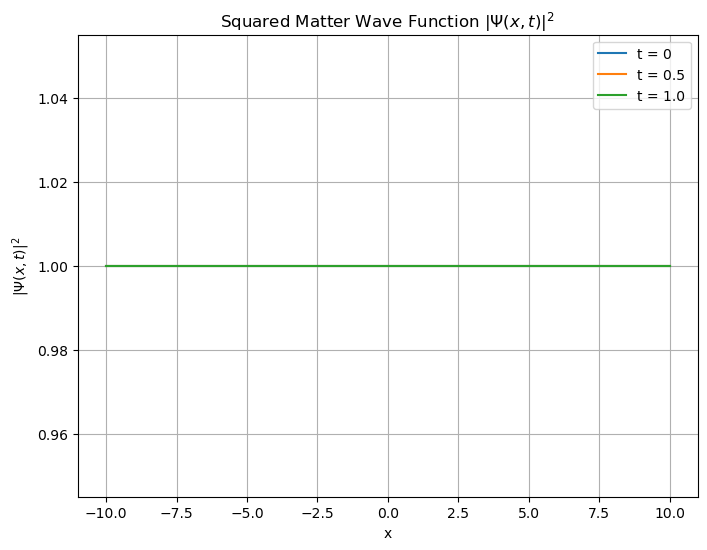

In [21]:
# Define constants 
k = 2 * np.pi  # wave number
omega = 2 * np.pi  # angular frequency

# Define the wave function
def psi(x, t):
    return np.exp(1j * (k * x - omega * t))

# Define |Psi(x, t)|^2
def psi_squared(x, t):
    return np.abs(psi(x, t)) ** 2

# Define x range
x = np.linspace(-10, 10, 1000)

# Plot |Psi(x, t)|^2 for t = 0 and two later times
t_values = [0, 0.5, 1.0]  # Three different times

plt.figure(figsize=(8, 6))

for t in t_values:
    plt.plot(x, psi_squared(x, t), label=f't = {t}')

plt.xlabel('x')
plt.ylabel(r'$|\Psi(x, t)|^2$')
plt.title(r'Squared Matter Wave Function $|\Psi(x, t)|^2$')
plt.legend()
plt.grid(True)
plt.show()


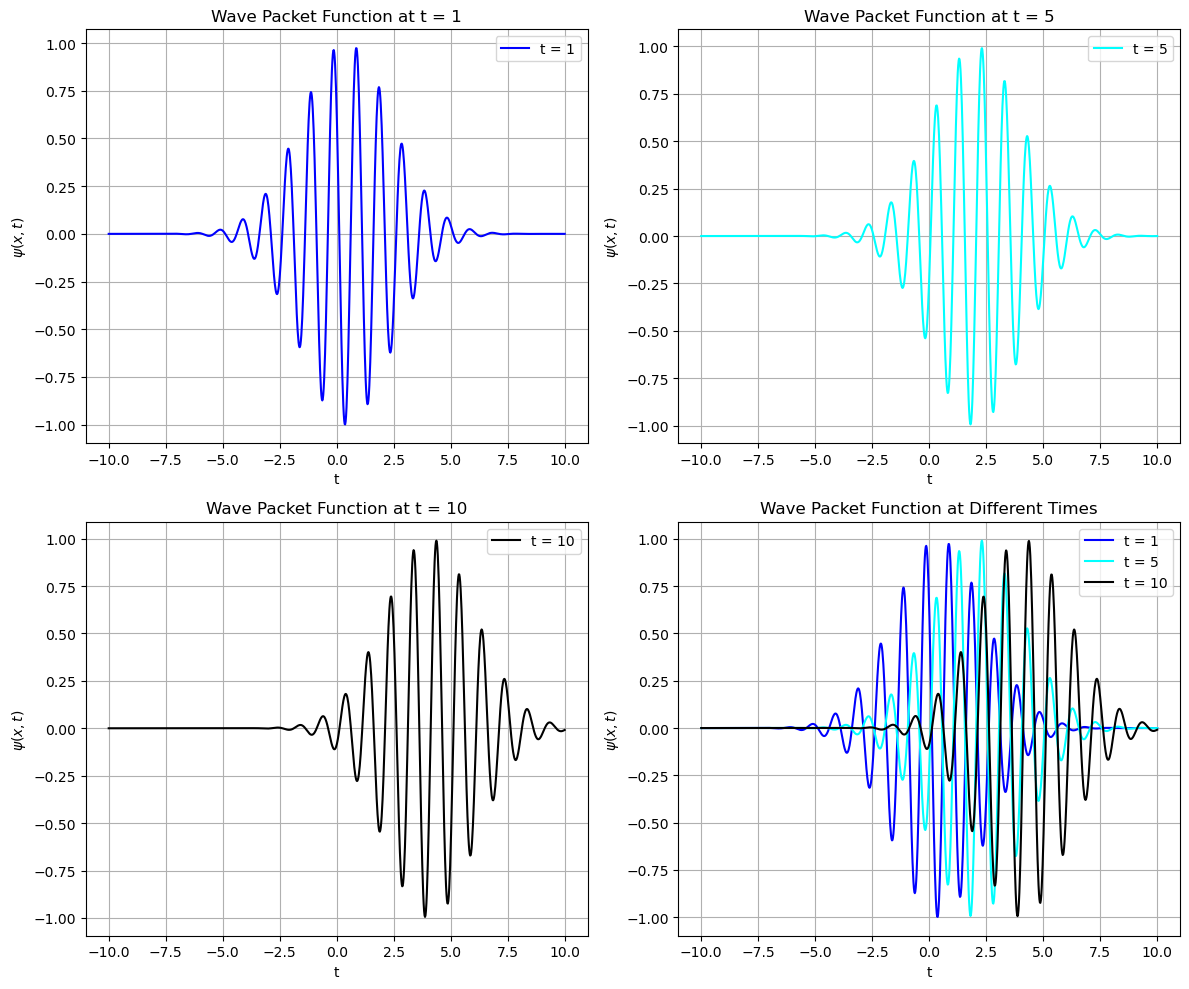

In [30]:
x = np.linspace(-10, 10, 1000)

# Define a wave packet function
def wave_packet_t(x, t, A, s, k, w):
  """
  Function to create a wave packet.
  Inputs: A, k, s -> parameters, x -> vector
  Output: psi_x -> wave packet
  """
  psi_xt = A*np.exp(-(x - t)**2/(2*s**2))*np.sin(k*x - w*t)

  return psi_xt
 
A = 1
s = 2
k = 2*np.pi

# Define the new parameters
w = 3*np.pi

# Time vector
t = np.linspace(0., 10., 50)

# Evaluate the packet:
y0 = wave_packet_t(x, t[2], A, s, k, w)
y1 = wave_packet_t(x, t[10], A, s, k, w)
y2 = wave_packet_t(x, t[20], A, s, k, w)

# Combined plot for all times in one figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for t = 1
axs[0, 0].plot(x, y0, color='blue', label='t = 1')
axs[0, 0].set_title('Wave Packet Function at t = 1')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel(r'$\psi(x, t)$')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for t = 5
axs[0, 1].plot(x, y1, color='cyan', label='t = 5')
axs[0, 1].set_title('Wave Packet Function at t = 5')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel(r'$\psi(x, t)$')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for t = 10
axs[1, 0].plot(x, y2, color='black', label='t = 10')
axs[1, 0].set_title('Wave Packet Function at t = 10')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel(r'$\psi(x, t)$')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Combined plot for all times
axs[1, 1].plot(x, y0, color='blue', label='t = 1')
axs[1, 1].plot(x, y1, color='cyan', label='t = 5')
axs[1, 1].plot(x, y2, color='black', label='t = 10')
axs[1, 1].set_title('Wave Packet Function at Different Times')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel(r'$\psi(x, t)$')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

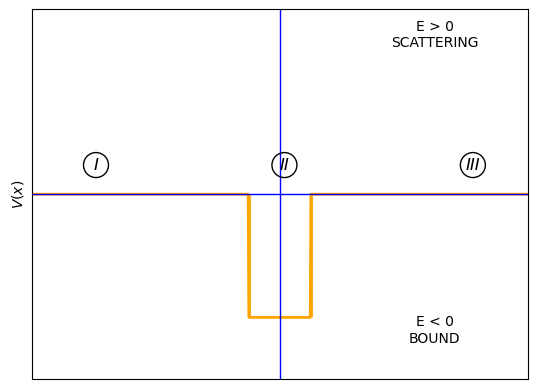

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots()

# Definir el rango para x y los valores del potencial V(x)
x = np.linspace(-10, 10, 1000)
V = np.piecewise(x, [x < -1, (x >= -1) & (x <= 1), x > 1], [0, -1, 0])

# Trazar la línea del potencial
ax.plot(x, V, color='orange', lw=2)

# Líneas verticales en x = -a y x = a para el pozo de potencial
ax.vlines([-1, 1], -1, 0, color='orange', lw=2)

# Eje x y y
ax.axhline(0, color='blue', lw=1)  # Eje x
ax.axvline(0, color='blue', lw=1)  # Eje y

# Agregar texto y anotaciones
ax.text(-6, 0.2, 'I', fontsize=12, style='italic', bbox=dict(facecolor='none', edgecolor='black', boxstyle='circle'))
ax.text(0, 0.2, 'II', fontsize=12, style='italic', bbox=dict(facecolor='none', edgecolor='black', boxstyle='circle'))
ax.text(6, 0.2, 'III', fontsize=12, style='italic', bbox=dict(facecolor='none', edgecolor='black', boxstyle='circle'))

# Límites del gráfico
ax.set_xlim(-8, 8)
ax.set_ylim(-1.5, 1.5)
ax.set_ylabel(r'$V(x)$')  # Fixed line
# Etiquetas adicionales
ax.text(5, 1.2, 'E > 0\nSCATTERING', fontsize=10, ha='center')
ax.text(5, -1.2, 'E < 0\nBOUND', fontsize=10, ha='center')

# Ajustar ejes
ax.set_xticks([])
ax.set_yticks([])

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_9199/2925068563.py:5: RuntimeWarning: divide by zero encountered in divide
  y_de = np.sqrt((z0/z)**2 -1.)
/tmp/ipykernel_9199/2925068563.py:5: RuntimeWarning: invalid value encountered in sqrt
  y_de = np.sqrt((z0/z)**2 -1.)


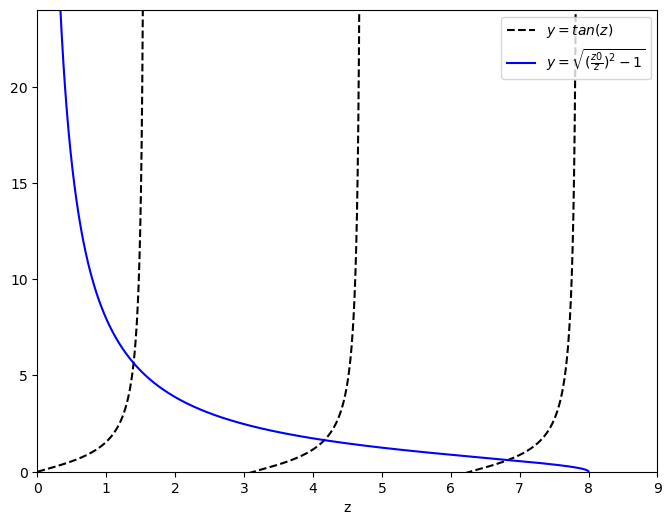

In [18]:
z0 = 8
z = np.arange(0., 10*np.pi, 0.001)

y_iz = np.tan(z)
y_de = np.sqrt((z0/z)**2 -1.)

y_iz[y_iz > +4*z0] = np.nan
y_de[y_de < -4*z0] = np.nan
plt.figure(figsize=(8, 6))
plt.plot(z, y_iz, c='black', linestyle='--', label=r'$y = tan(z)$')
plt.plot(z, y_de, c='blue', label=r'$y = \sqrt{(\frac{z0}{z})^2 - 1}$')
plt.xlim(0, z0 + 1)
plt.ylim(0, 3 * z0)
plt.xlabel('z')
plt.legend()
plt.show()


/tmp/ipykernel_9199/949357292.py:5: RuntimeWarning: divide by zero encountered in divide
  y_iz_odd = 1/np.tan(z)
/tmp/ipykernel_9199/949357292.py:6: RuntimeWarning: divide by zero encountered in divide
  y_de_odd = np.sqrt((z0/z)**2 -1.)
/tmp/ipykernel_9199/949357292.py:6: RuntimeWarning: invalid value encountered in sqrt
  y_de_odd = np.sqrt((z0/z)**2 -1.)


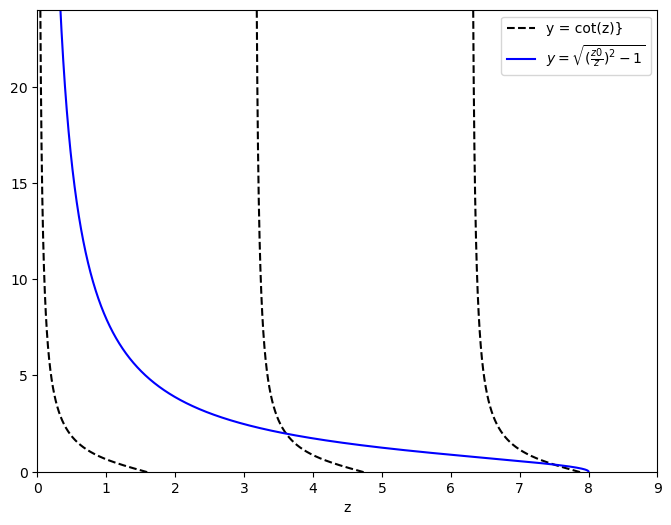

[3.49352263e-03 3.60792429e+00 7.58863341e+00]


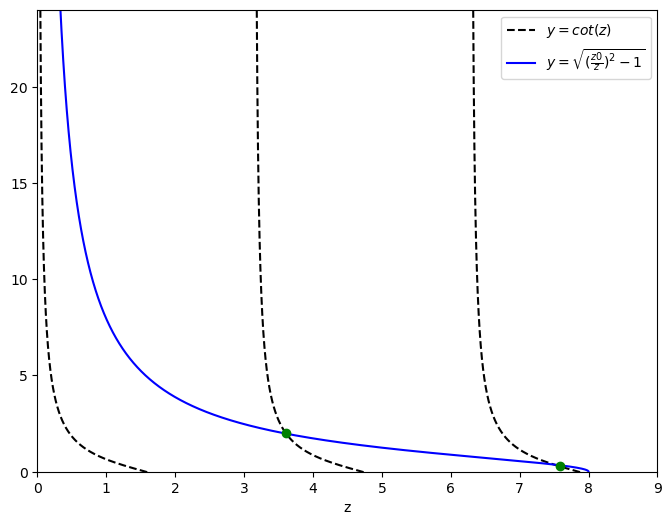

In [49]:
#Plot of odd Transcendental functions
z0 = 8
z = np.arange(0., 10*np.pi, 0.001)

y_iz_odd = 1/np.tan(z)
y_de_odd = np.sqrt((z0/z)**2 -1.)
y_iz_odd[y_iz_odd > +4*z0] = np.nan
y_de_odd[y_de_odd < -4*z0] = np.nan

plt.figure(figsize=(8, 6))
plt.plot(z, y_iz_odd, c='black', linestyle='--', label='y = cot(z)}')
plt.plot(z, y_de_odd, c='blue', label=r'$y = \sqrt{(\frac{z0}{z})^2 - 1}$')
plt.xlim(0, z0 + 1)
plt.ylim(0, 3 * z0)
plt.xlabel('z')
plt.legend()
plt.show()

#Numerical Solve
def f(z, z0):
    opt_f = (np.sqrt((z0/z)**2 -1.) * np.tan(z)) - 1
    return opt_f

r = opt.root(f, [1.,3.,7.], args=z0)
print(r.x)

y1 = 1/np.tan(r.x[1])
y2 = 1/np.tan(r.x[2])

plt.figure(figsize=(8, 6))
plt.plot(z, y_iz_odd, c='black', linestyle='--', label=r'$y = cot(z)$')
plt.plot(z, y_de_odd , c='blue', label=r'$y = \sqrt{(\frac{z0}{z})^2 - 1}$')
plt.plot(r.x[1], y1, marker = "o", c = 'green')
plt.plot(r.x[2], y2, marker = "o", c = 'green')
plt.xlim(0, z0 + 1)
plt.ylim(0, 3 * z0)
plt.xlabel('z')
plt.legend()
plt.show()